# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
----

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Perform Exploratory Data Analysis

In [3]:
df = pd.read_csv('cia_factbook.csv')
df.variables = df.columns
print("Basic information about the dataset:")
df.info()

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10  population_growth_rate   233 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.4+ KB


In [4]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80


In [5]:
print("Summary statistics of numerical columns:")
df.describe()

Summary statistics of numerical columns:


,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
count,2.570000e+02,224.000000,225.000000,224.000000,2.130000e+02,224.000000,184.000000,222.000000,2.380000e+02,233.000000
mean,5.308881e+05,19.659063,7.906978,24.484420,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858
std,1.696869e+06,9.669575,2.979933,24.077809,3.350725e+07,8.798460,262.508297,11.142682,1.277013e+08,1.418633
min,0.000000e+00,6.720000,1.530000,1.810000,4.640000e+02,49.440000,2.000000,-113.510000,4.800000e+01,-9.730000
25%,6.160000e+02,11.840000,5.930000,6.185000,8.640000e+04,67.000000,20.000000,-2.015000,3.265865e+05,0.260000
50%,5.119700e+04,16.890000,7.630000,13.985000,7.164000e+05,74.360000,65.500000,-0.045000,5.220371e+06,1.020000
75%,3.381450e+05,24.915000,9.450000,38.655000,4.200000e+06,78.292500,240.000000,1.257500,1.826175e+07,1.920000
max,1.709824e+07,46.120000,17.490000,117.230000,3.890000e+08,89.570000,2054.000000,83.820000,1.355693e+09,9.370000


In [6]:
print("Number of missing values in each column:")
print(df.isna().sum())

Number of missing values in each column:
country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64


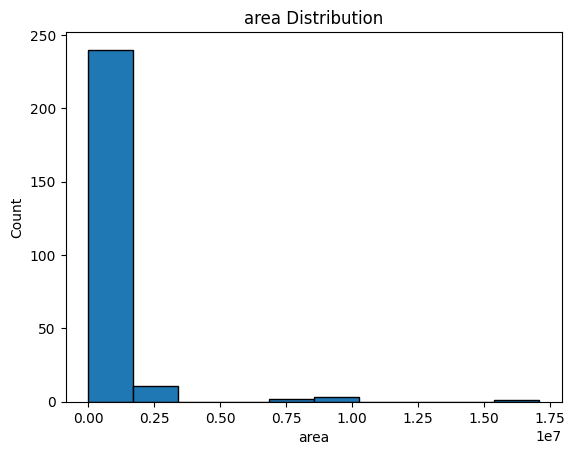

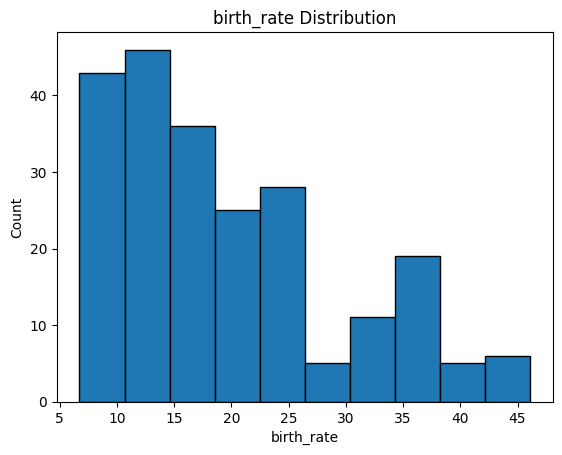

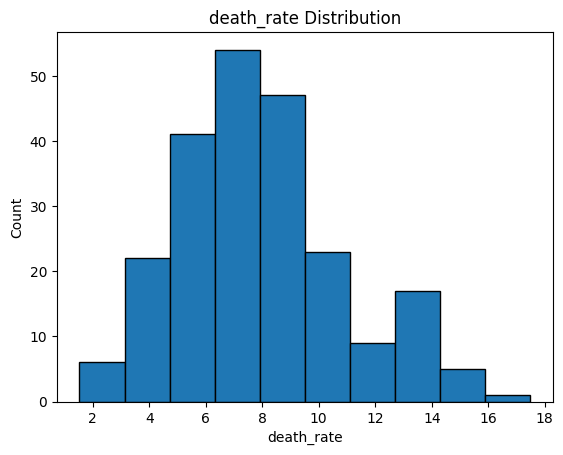

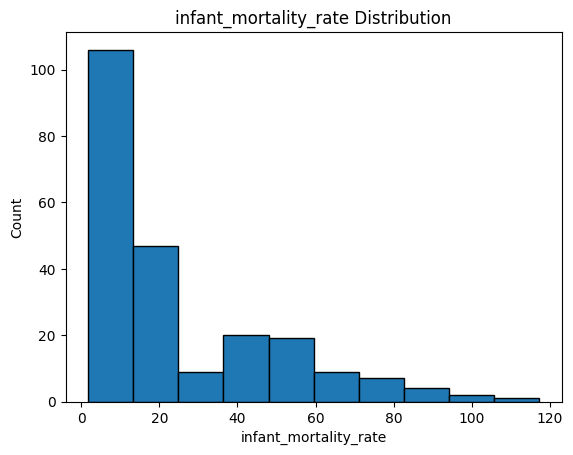

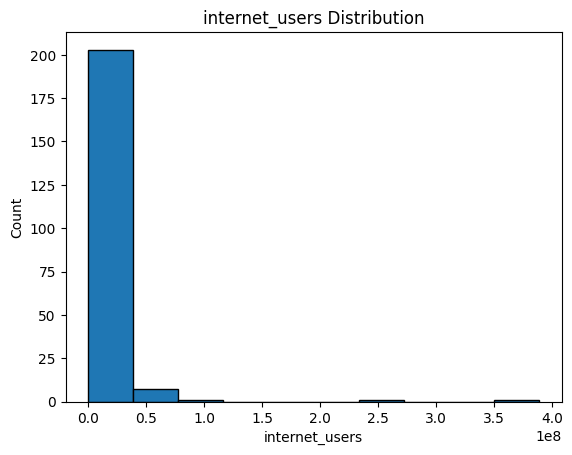

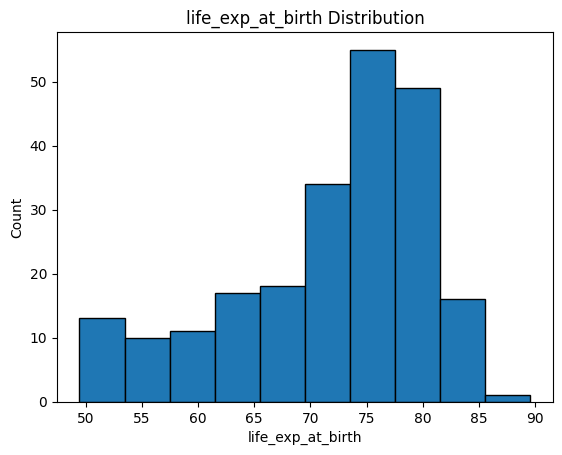

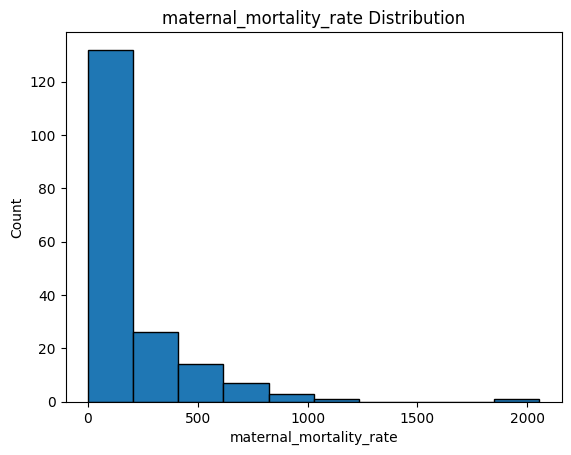

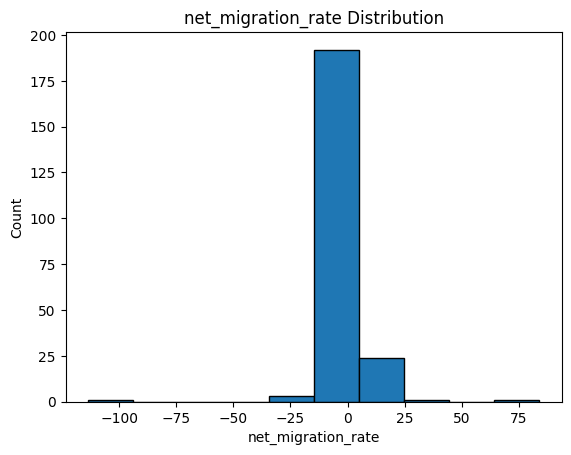

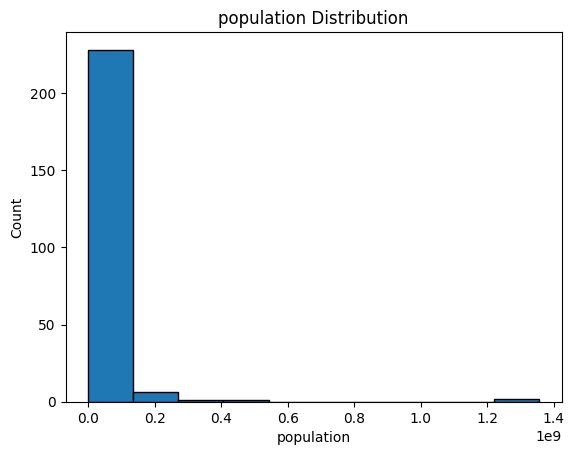

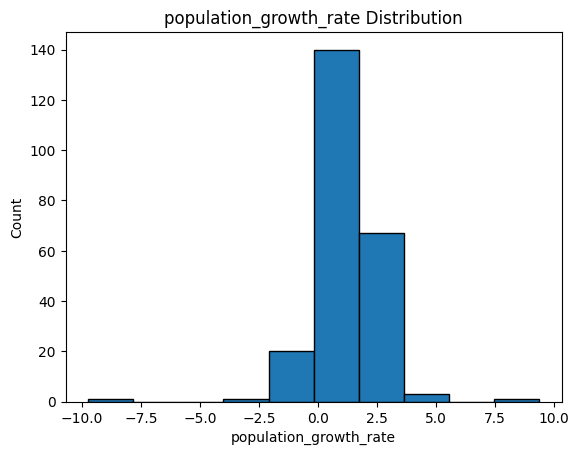

In [7]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.hist(df[column], edgecolor='black')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

-----

## 2. Feature Engineering for Missing Data

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [8]:
# THERE IS NO AGRICULTURE COLUMN, USED POPULATION AS SUBSTITUTE

nan_population_countries = df[df['population'].isna()]

print("Countries with NaN values for population:")
print(nan_population_countries[['country', 'population']])

print("\nMain aspects of these countries:")
print(nan_population_countries.describe(include='all'))

Countries with NaN values for population:
                                           country  population
236                                      Jan Mayen         NaN
237                                 Howland Island         NaN
238              Heard Island and McDonald Islands         NaN
239       South Georgia and South Sandwich Islands         NaN
240                                Spratly Islands         NaN
241                                 Midway Islands         NaN
242                              Clipperton Island         NaN
243                 British Indian Ocean Territory         NaN
244                                 Johnston Atoll         NaN
245                    Ashmore and Cartier Islands         NaN
246                                  Jarvis Island         NaN
247                              Coral Sea Islands         NaN
248            French Southern and Antarctic Lands         NaN
249                                 Navassa Island         NaN
250          

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [9]:
# THERE IS NO CLIMATE COLUMN, USED INTERNET_USERS AS SUBSTITUTE

df['internet_users'] = df.groupby('country')['internet_users'].transform(lambda x: x.fillna(x.mean()))

overall_mean_climate = df['internet_users'].mean()
df['internet_users'].fillna(overall_mean_climate, inplace=True)
df['internet_users']

0      4.085300e+07
1      2.696000e+07
2      2.450000e+08
3      3.890000e+08
4      7.598200e+07
           ...     
254    8.311771e+06
255    8.311771e+06
256    8.311771e+06
257    8.311771e+06
258    8.311771e+06
Name: internet_users, Length: 259, dtype: float64

**TASK:Use the same method for the missing values in Literacy.**

In [10]:
# THERE IS NO LITERACY COLUMN, USED death_rate AS SUBSTITUTE

df['death_rate'] = df.groupby('country')['death_rate'].transform(lambda x: x.fillna(x.mean()))

overall_mean_death_rate = df['death_rate'].mean()
df['death_rate'].fillna(overall_mean_death_rate, inplace=True)
df

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.830000,7.08,4.085300e+07,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.310000,4.71,2.696000e+07,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.150000,6.17,2.450000e+08,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.440000,14.79,3.890000e+08,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.540000,19.21,7.598200e+07,73.28,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,NaN,7.906978,NaN,8.311771e+06,NaN,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,NaN,7.906978,NaN,8.311771e+06,NaN,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,NaN,7.906978,NaN,8.311771e+06,NaN,NaN,NaN,NaN,NaN
257,European Union,NaN,NaN,7.906978,4.33,8.311771e+06,80.02,NaN,NaN,5.114348e+08,NaN


# 3. Data Feature Preparation

**TASK: Create a dummy variable to all categorical data.**

In [11]:
dummy_variables = pd.get_dummies(df['country'], drop_first=True)
df = pd.concat([df, dummy_variables], axis=1)
df.drop('country', axis=1, inplace=True)
df

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,Venezuela,Vietnam,Virgin Islands,Wake Island,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
0,17098242.0,11.87,13.830000,7.08,4.085300e+07,70.16,34.0,1.69,1.424703e+08,-0.03,...,False,False,False,False,False,False,False,False,False,False
1,9984670.0,10.29,8.310000,4.71,2.696000e+07,81.67,12.0,5.66,3.483484e+07,0.76,...,False,False,False,False,False,False,False,False,False,False
2,9826675.0,13.42,8.150000,6.17,2.450000e+08,79.56,21.0,2.45,3.188921e+08,0.77,...,False,False,False,False,False,False,False,False,False,False
3,9596960.0,12.17,7.440000,14.79,3.890000e+08,75.15,37.0,-0.32,1.355693e+09,0.44,...,False,False,False,False,False,False,False,False,False,False
4,8514877.0,14.72,6.540000,19.21,7.598200e+07,73.28,56.0,-0.15,2.026568e+08,0.80,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,49.0,NaN,7.906978,NaN,8.311771e+06,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
255,12.0,NaN,7.906978,NaN,8.311771e+06,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
256,123.0,NaN,7.906978,NaN,8.311771e+06,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
257,NaN,NaN,7.906978,4.33,8.311771e+06,80.02,NaN,NaN,5.114348e+08,NaN,...,False,False,False,False,False,False,False,False,False,False


**TASK: For numerical data perform standard scaler.**

In [12]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,Venezuela,Vietnam,Virgin Islands,Wake Island,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
0,9.782533,-0.807327,2.137287e+00,-0.724460,1.073438e+00,-0.189875,-0.549947,0.168344,0.864581,-0.798862,...,False,False,False,False,False,False,False,False,False,False
1,5.582179,-0.971092,1.454281e-01,-0.823111,6.151497e-01,1.121238,-0.633983,0.525437,0.019936,-0.240790,...,False,False,False,False,False,False,False,False,False,False
2,5.488888,-0.646671,8.769309e-02,-0.762338,7.807642e+00,0.880886,-0.599604,0.236705,2.249012,-0.233725,...,False,False,False,False,False,False,False,False,False,False
3,5.353248,-0.776232,-1.685061e-01,-0.403531,1.255777e+01,0.378540,-0.538488,-0.012451,10.385072,-0.466844,...,False,False,False,False,False,False,False,False,False,False
4,4.714310,-0.511928,-4.932656e-01,-0.219548,2.232240e+00,0.165527,-0.465911,0.002840,1.336881,-0.212533,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,-0.313445,NaN,3.204938e-16,NaN,6.144313e-17,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
255,-0.313467,NaN,3.204938e-16,NaN,6.144313e-17,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
256,-0.313401,NaN,3.204938e-16,NaN,6.144313e-17,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
257,NaN,NaN,3.204938e-16,-0.838928,6.144313e-17,0.933285,NaN,NaN,3.759948,NaN,...,False,False,False,False,False,False,False,False,False,False


# 4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.

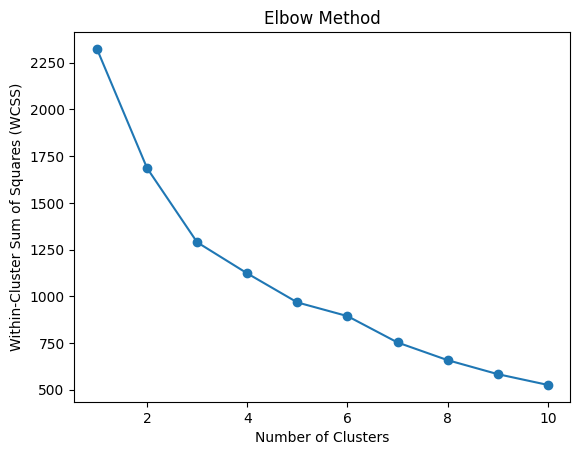

In [13]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

X = df.select_dtypes(include=['float64'])
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_imputed_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

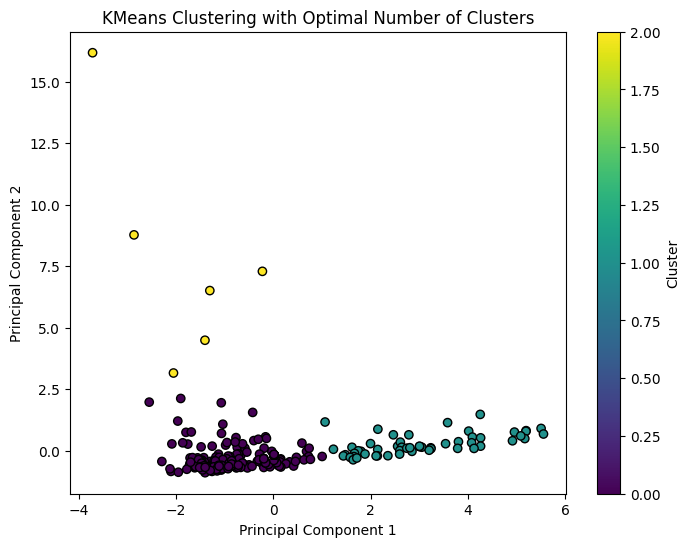

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

optimal_n_clusters = 3

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_imputed_df)

kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_imputed_df)

cluster_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.title('KMeans Clustering with Optimal Number of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

-----

# 5. Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.**


The choice of K value in K-means clustering depends on the specific dataset and the underlying structure you're trying to uncover. There isn't a universally "good" K value, as it heavily relies on the characteristics of the data and the objectives of the analysis. Generally, one might use techniques like the elbow method or silhouette score to determine an optimal K, but even then, it's often a judgment call. Multiple reasonable choices for K can exist if there are different interpretations of the data, and features such as data distribution, domain knowledge, and the desired granularity of clusters play a significant role in defining these choices.

---